# Chapter 5. Exploratory Data Analysis

In [1]:
options(repr.plot.width = 8, repr.plot.height = 6)
library(modelr)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Questions

> *There are no routine statistical questions, only questionable statistical routines.*
> 
> —Sir David Cox

> *Far better an approximate answer to the right question, which is often vague, than an exact answer to the wrong question, which can always be made precise.*
> 
> —John Tukey

> There is no rule about which questions you should ask to guide your research. However, two types of questions will always be useful for making discoveries within your data. You can loosely word these questions as:
> - What type of variation occurs within my variables?
> - What type of covariation occurs between my variables?

> - A *variable* is a quantity, quality, or property that you can measure.
> - A *value* is the state of a variable when you measure it. The value of a variable may change from measurement to measurement.
> - An *observation*, or a *case*, is a set of measurements made under similar conditions (you usually make all of the measurements in an observation at the same time and on the same object). An observation will contain several values, each associated with a different variable. I’ll sometimes refer to an observation as a data point.
> - *Tabular data* is a set of values, each associated with a variable and an observation. Tabular data is *tidy* if each value is placed in its own “cell,” each variable in its own column, and each observation in its own row.

## Variation

> *Variation* is the tendency of the values of a variable to change from measurement to measurement.

> How you visualize the distribution of a variable will depend on whether the variable is categorical or continuous. A variable is *categorical* if it can only take one of a small set of values. In R, categorical variables are usually saved as factors or character vectors. To examine the distribution of a categorical variable, use a bar chart.

cut,n
<ord>,<int>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


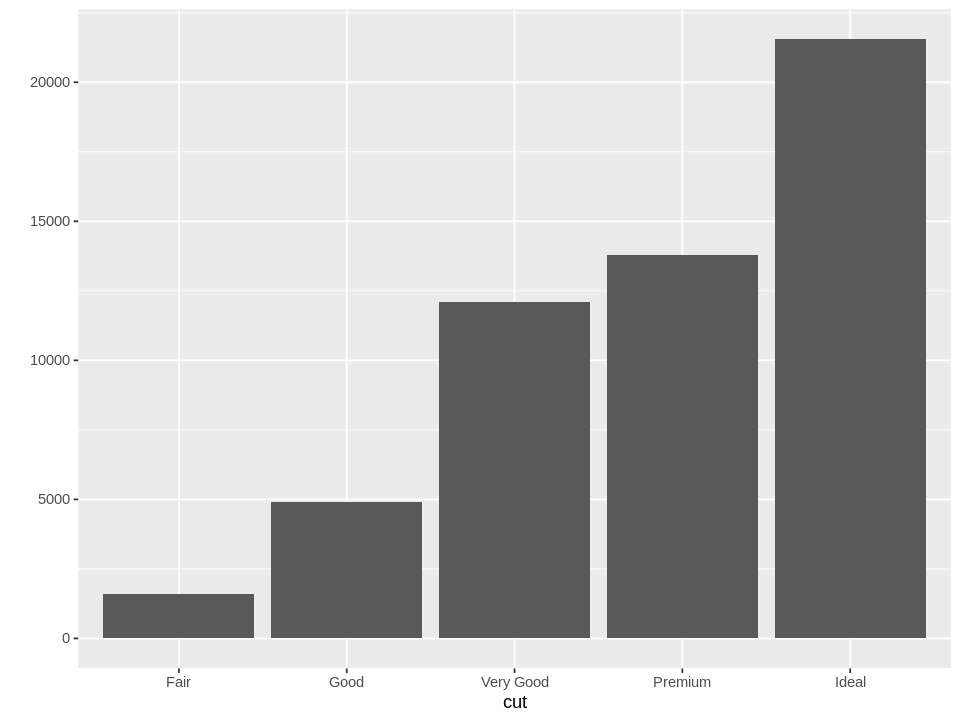

In [2]:
count(diamonds, cut)
qplot(cut, data = diamonds)

> A variable is *continuous* if it can take any of an infinite set of ordered values. Numbers and date-times are two examples of continuous variables. To examine the distribution of a continuous variable, use a histogram.

"cut_width(carat, 0.5)",n
<fct>,<int>
"[-0.25,0.25]",785
"(0.25,0.75]",29498
"(0.75,1.25]",15977
"(1.25,1.75]",5313
"(1.75,2.25]",2002
"(2.25,2.75]",322
"(2.75,3.25]",32
"(3.25,3.75]",5
"(3.75,4.25]",4


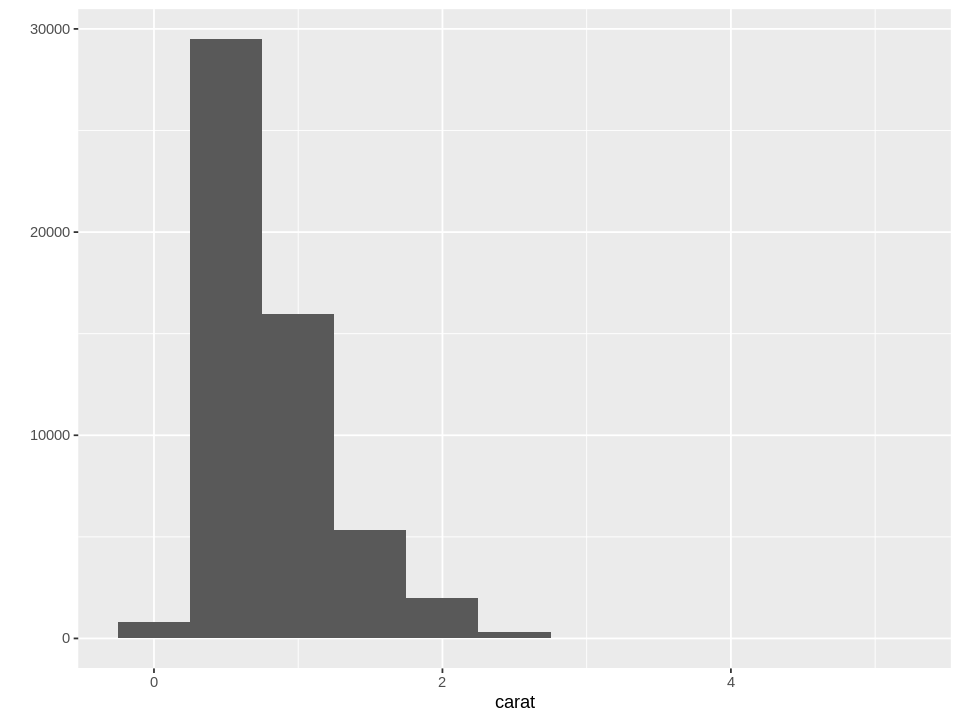

In [3]:
count(diamonds, cut_width(carat, .5))
qplot(carat, data = diamonds, binwidth = .5)

> You should always explore a variety of binwidths when working with histograms, as different binwidths can reveal different patterns.

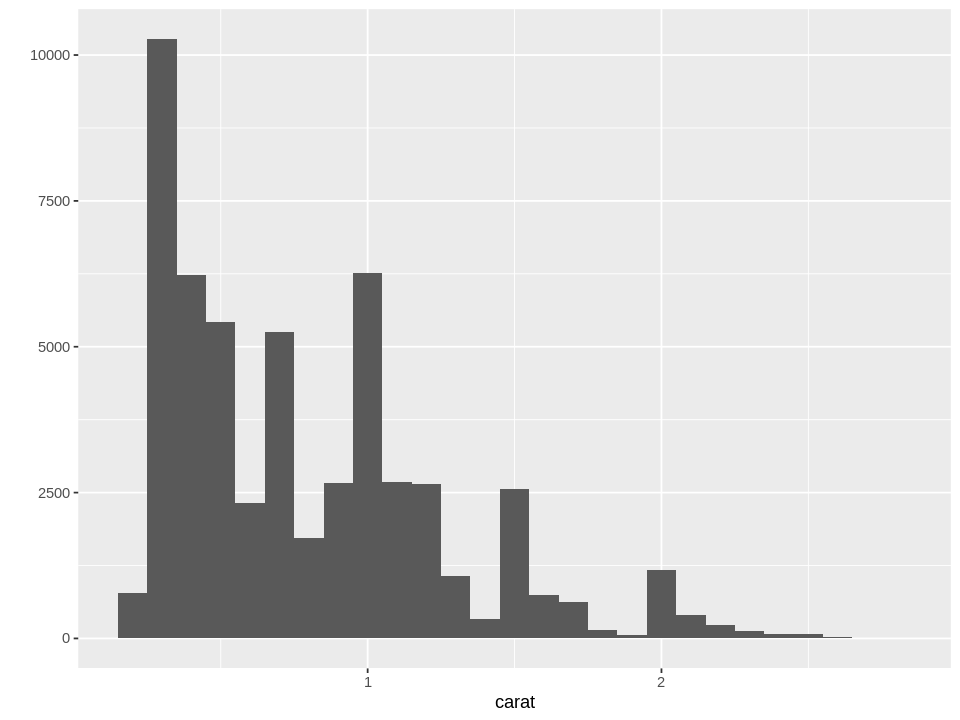

In [4]:
qplot(carat, data = filter(diamonds, carat < 3), binwidth = .1)

> If you wish to overlay multiple histograms in the same plot, I recommend using `geom_freqpoly()` instead of `geom_histogram()`. `geom_freqpoly()` performs the same calculation as `geom_histogram()`, but instead of displaying the counts with bars, uses lines instead.

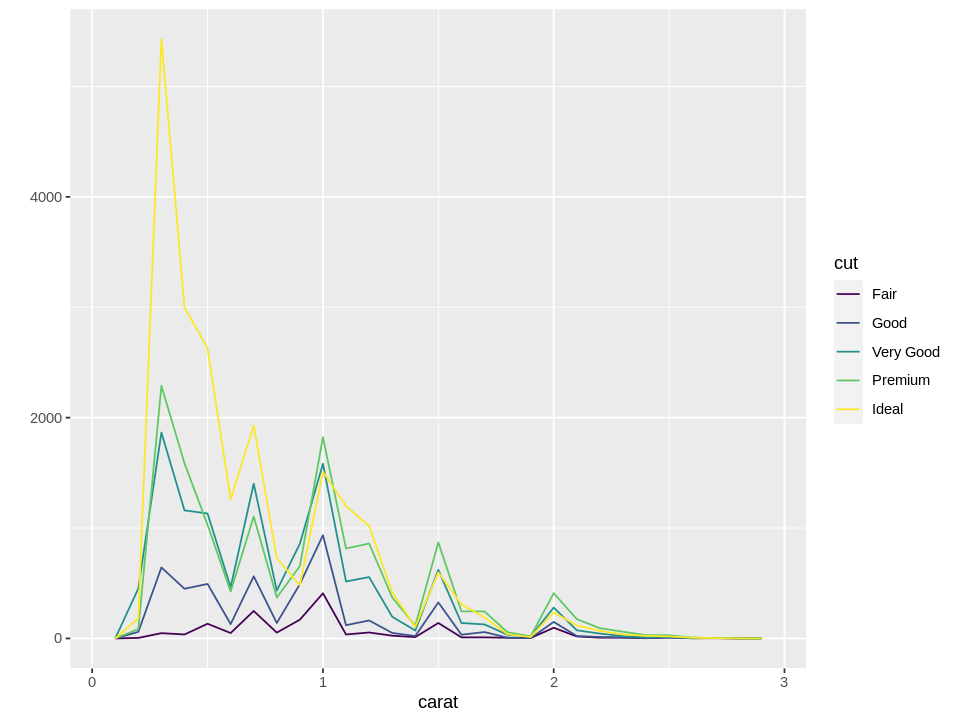

In [5]:
qplot(carat, color = cut, data = filter(diamonds, carat < 3), geom = "freqpoly", binwidth = .1)

> - Which values are the most common? Why?
> - Which values are rare? Why? Does that match your expectations?
> - Can you see any unusual patterns? What might explain them?

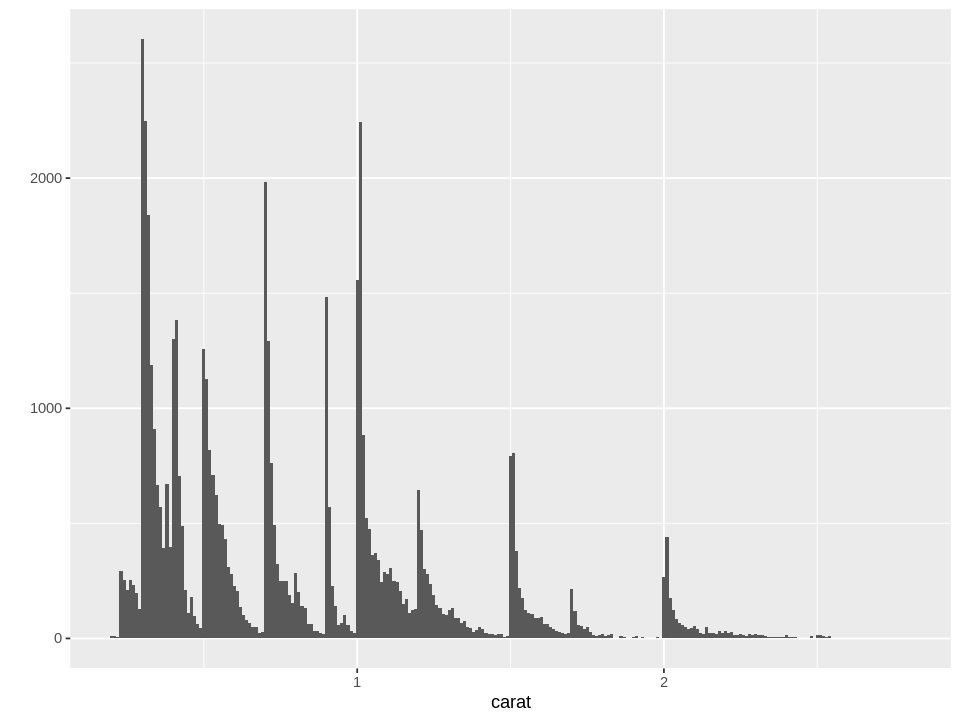

In [6]:
qplot(carat, data = filter(diamonds, carat < 3), binwidth = .01)

> In general, clusters of similar values suggest that subgroups exist in your data. To understand the subgroups, ask:
> - How are the observations within each cluster similar to each other?
> - How are the observations in separate clusters different from each other?
> - How can you explain or describe the clusters?
> - Why might the appearance of clusters be misleading?

In [7]:
summary(faithful)
head(faithful)
?faithful

   eruptions        waiting    
 Min.   :1.600   Min.   :43.0  
 1st Qu.:2.163   1st Qu.:58.0  
 Median :4.000   Median :76.0  
 Mean   :3.488   Mean   :70.9  
 3rd Qu.:4.454   3rd Qu.:82.0  
 Max.   :5.100   Max.   :96.0  

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55


faithful               package:datasets                R Documentation

_O_l_d _F_a_i_t_h_f_u_l _G_e_y_s_e_r _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Waiting time between eruptions and the duration of the eruption
     for the Old Faithful geyser in Yellowstone National Park, Wyoming,
     USA.

_U_s_a_g_e:

     faithful
     
_F_o_r_m_a_t:

     A data frame with 272 observations on 2 variables.

       [,1]  eruptions  numeric  Eruption time in mins 
       [,2]  waiting    numeric  Waiting time to next 
                                 eruption (in mins) 
      
_D_e_t_a_i_l_s:

     A closer look at ‘faithful$eruptions’ reveals that these are
     heavily rounded times originally in seconds, where multiples of 5
     are more frequent than expected under non-human measurement.  For
     a better version of the eruption times, see the example below.

     There are many versions of this dataset around: Azzalini and
     Bowman (1990) use a more complete version.

_S_o_u_r_c_e:

     W. Härdle.

_R_e_f_e_r_e_n_c_e_s:

     Härdle, W. (1991).  _Smoothing Techniques with Implementation in
     S_.  New York: Springer.

     Azzalini, A. and Bowman, A. W. (1990).  A look at some data on the
     Old Faithful geyser.  _Applied Statistics_, *39*, 357-365.  doi:
     10.2307/2347385 (URL: https://doi.org/10.2307/2347385).

_S_e_e _A_l_s_o:

     ‘geyser’ in package ‘MASS’ for the Azzalini-Bowman version.

_E_x_a_m_p_l_e_s:

     require(stats); require(graphics)
     f.tit <-  "faithful data: Eruptions of Old Faithful"
     
     ne60 <- round(e60 <- 60 * faithful$eruptions)
     all.equal(e60, ne60)             # relative diff. ~ 1/10000
     table(zapsmall(abs(e60 - ne60))) # 0, 0.02 or 0.04
     faithful$better.eruptions <- ne60 / 60
     te <- table(ne60)
     te[te >= 4]                      # (too) many multiples of 5 !
     plot(names(te), te, type = "h", main = f.tit, xlab = "Eruption time (sec)")
     
     plot(faithful[, -3], main = f.tit,
          xlab = "Eruption time (min)",
          ylab = "Waiting time to next eruption (min)")
     lines(lowess(faithful$eruptions, faithful$waiting, f = 2/3, iter = 3),
           col = "red")

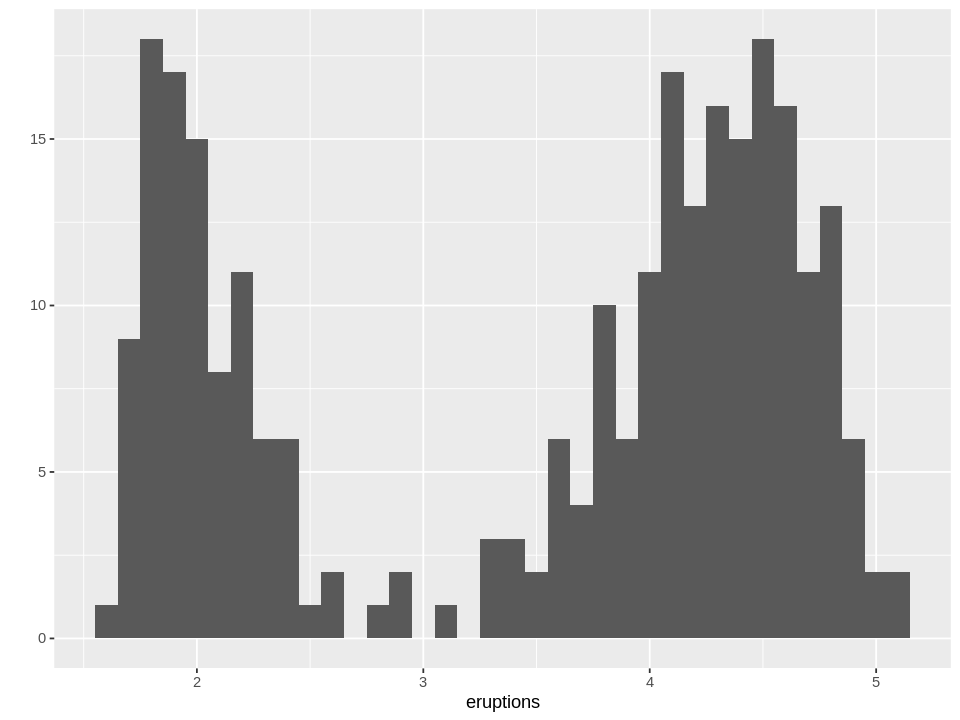

In [8]:
qplot(eruptions, data = faithful, binwidth = .1)

> To make it easy to see the unusual values, we need to zoom in to small values of the y-axis with `coord_cartesian()`.

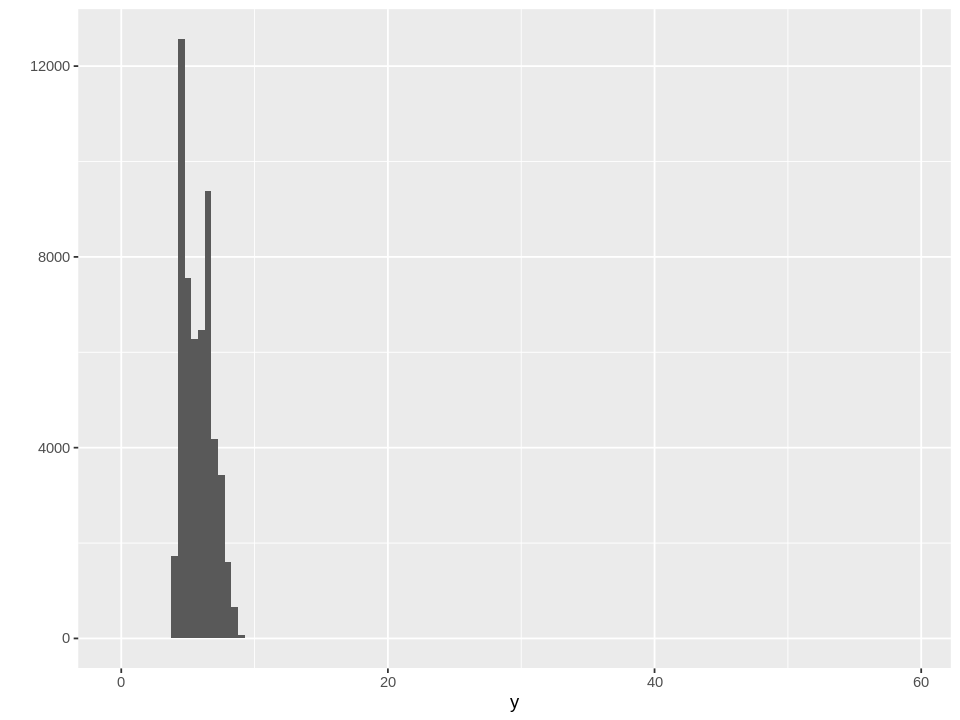

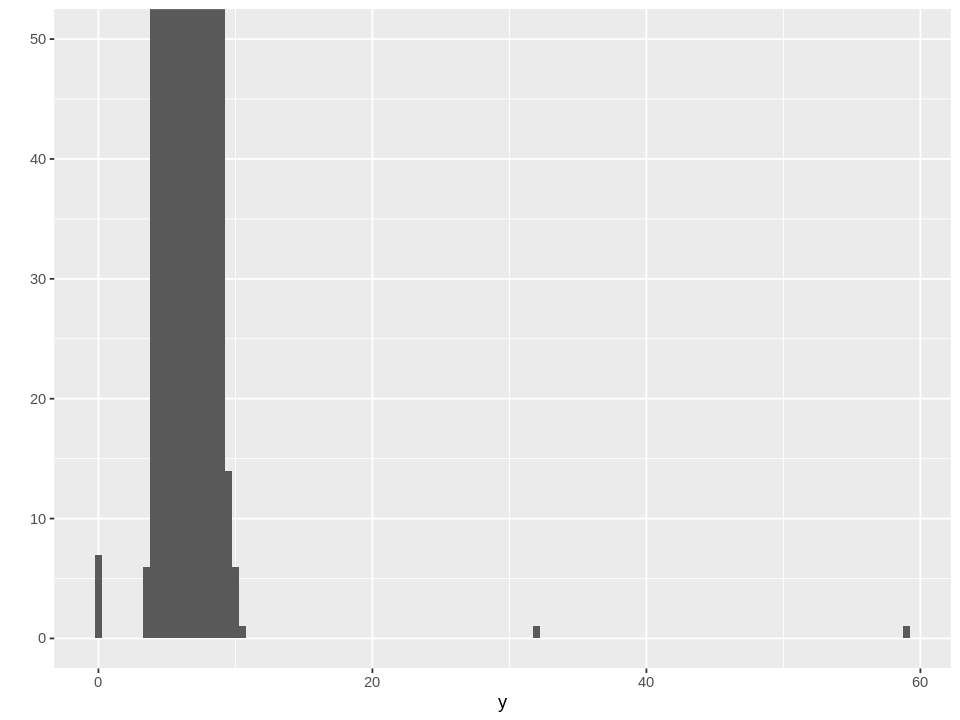

In [9]:
qplot(y, data = diamonds, binwidth = .5)
qplot(y, data = diamonds, binwidth = .5) + coord_cartesian(ylim = c(0, 50))

In [10]:
filter(diamonds, y < 3 | y > 20) %>% arrange(y)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.00,Very Good,H,VS2,63.3,53,5139,0.00,0.0,0.00
1.14,Fair,G,VS1,57.5,67,6381,0.00,0.0,0.00
1.56,Ideal,G,VS2,62.2,54,12800,0.00,0.0,0.00
1.20,Premium,D,VVS1,62.1,59,15686,0.00,0.0,0.00
2.25,Premium,H,SI2,62.8,59,18034,0.00,0.0,0.00
0.71,Good,F,SI2,64.1,60,2130,0.00,0.0,0.00
0.71,Good,F,SI2,64.1,60,2130,0.00,0.0,0.00
0.51,Ideal,E,VS1,61.8,55,2075,5.15,31.8,5.12
2.00,Premium,H,SI2,58.9,57,12210,8.09,58.9,8.06


> It’s good practice to repeat your analysis with and without the outliers. If they have minimal effect on the results, and you can’t figure out why they’re there, it’s reasonable to replace them with missing values and move on. However, if they have a substantial effect on your results, you shouldn’t drop them without justification. You’ll need to figure out what caused them (e.g., a data entry error) and disclose that you removed them in your write-up.

### Exercises

1. Explore the distribution of each of the `x`, `y`, and `z` variables in `diamonds`. What do you learn? Think about a diamond and how you might decide which dimension is the length, width, and depth.
1. Explore the distribution of `price`. Do you discover anything unusual or surprising? (Hint: carefully think about the binwidth and make sure you try a wide range of values.)
1. How many diamonds are 0.99 carat? How many are 1 carat? What do you think is the cause of the difference?
1. Compare and contrast `coord_cartesian()` versus `xlim()` or `ylim()` when zooming in on a histogram. What happens if you leave binwidth unset? What happens if you try and zoom so only half a bar shows?

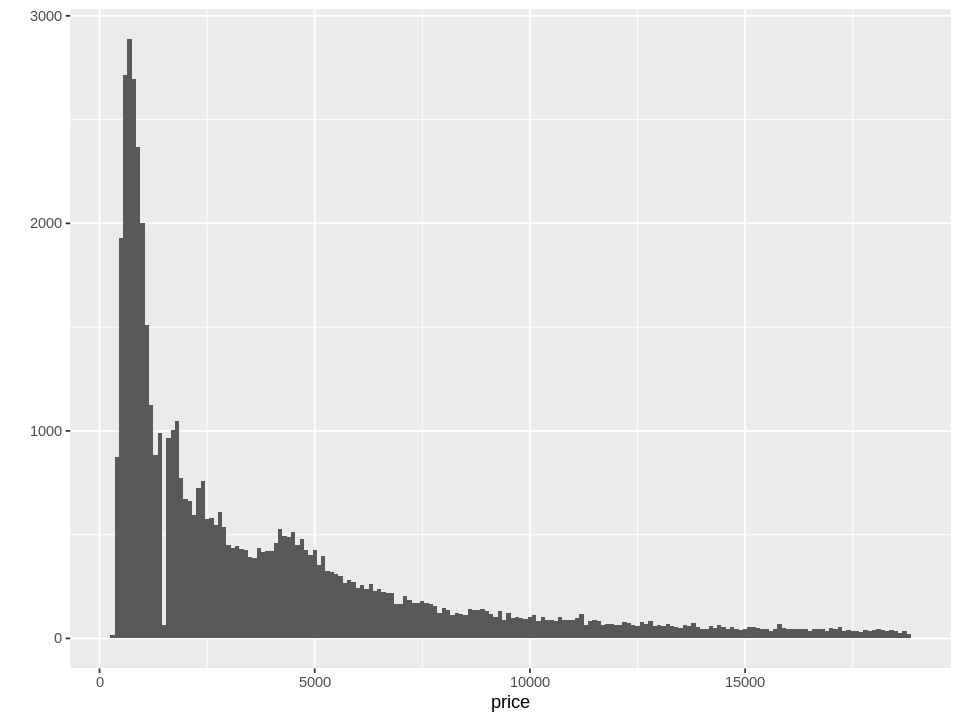

In [11]:
qplot(price, data = diamonds, binwidth = 100)

## Missing Values

> If you’ve encountered unusual values in your dataset, and simply want to move on to the rest of your analysis, you have two options:
> - Drop the entire row with the strange values. I don’t recommend this option as just because one measurement is invalid, doesn’t mean all the measurements are. Additionally, if you have low-quality data, by time that you’ve applied this approach to every variable you might find that you don’t have any data left!
> - Instead, I recommend replacing the unusual values with missing values. The easiest way to do this is to use `mutate()` to replace the variable with a modified copy. You can use the `ifelse()` function to replace unusual values with `NA`.

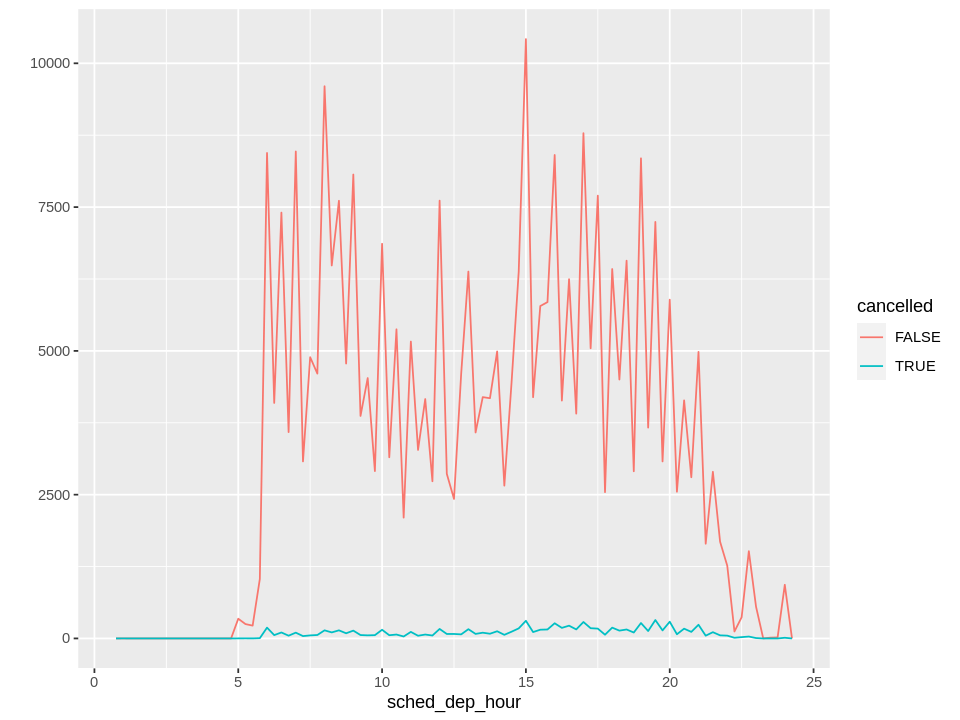

In [12]:
nycflights13::flights %>%
  mutate(
    cancelled = is.na(dep_time),
    sched_dep_hour = sched_dep_time %/% 100 + sched_dep_time %% 100 / 60
  ) %>%
  qplot(sched_dep_hour, color = cancelled, data = ., geom = "freqpoly", binwidth = 1 / 4)

### Exercises

1. What happens to missing values in a histogram? What happens to missing values in a bar chart? Why is there a difference?
1. What does `na.rm = TRUE` do in `mean()` and `sum()`?

## Covariation

> If variation describes the behavior *within* a variable, covariation describes the behavior *between* variables. *Covariation* is the tendency for the values of two or more variables to vary together in a related way.

### A Categorical and Continuous Variable

> It’s common to want to explore the distribution of a continuous variable broken down by a categorical variable, as in the previous frequency polygon. The default appearance of `geom_freqpoly()` is not that useful for that sort of comparison because the height is given by the count. It’s hard to see the difference in distribution because the overall counts differ so much.

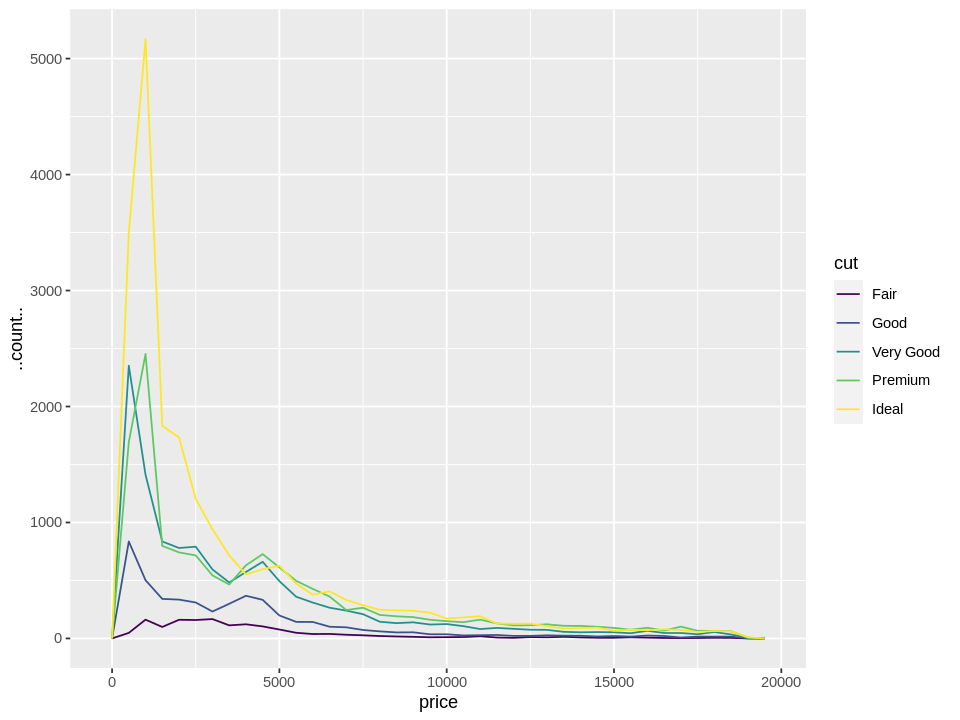

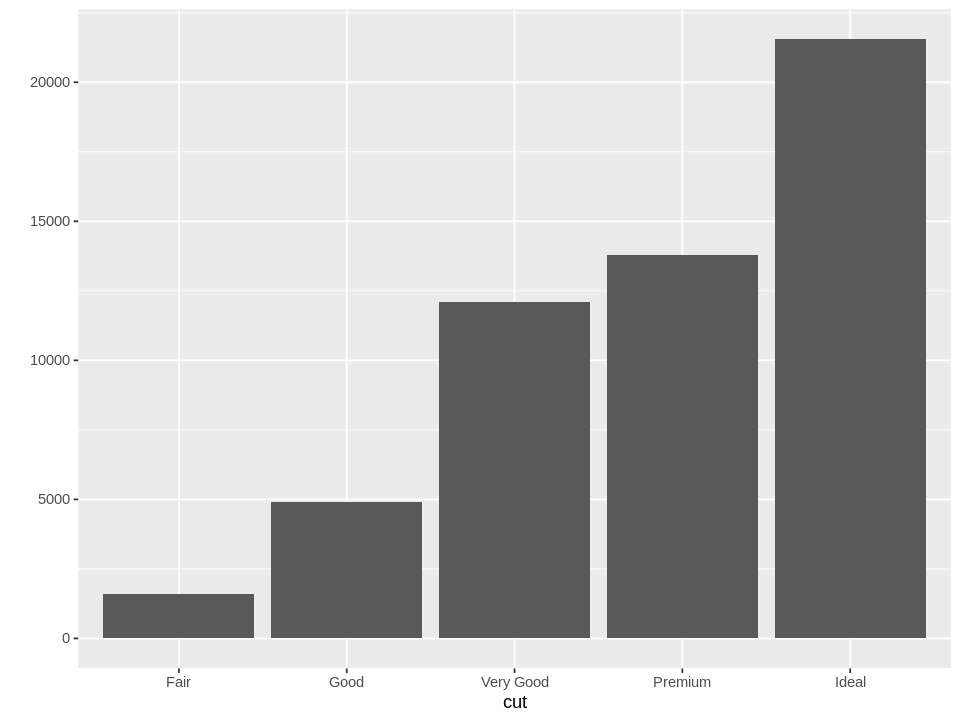

In [13]:
qplot(price, ..count.., color = cut, data = diamonds, geom = "freqpoly", binwidth = 500)
qplot(cut, data = diamonds)

> Instead of displaying count, we’ll display *density*, which is the count standardized so that the area under each frequency polygon is one.

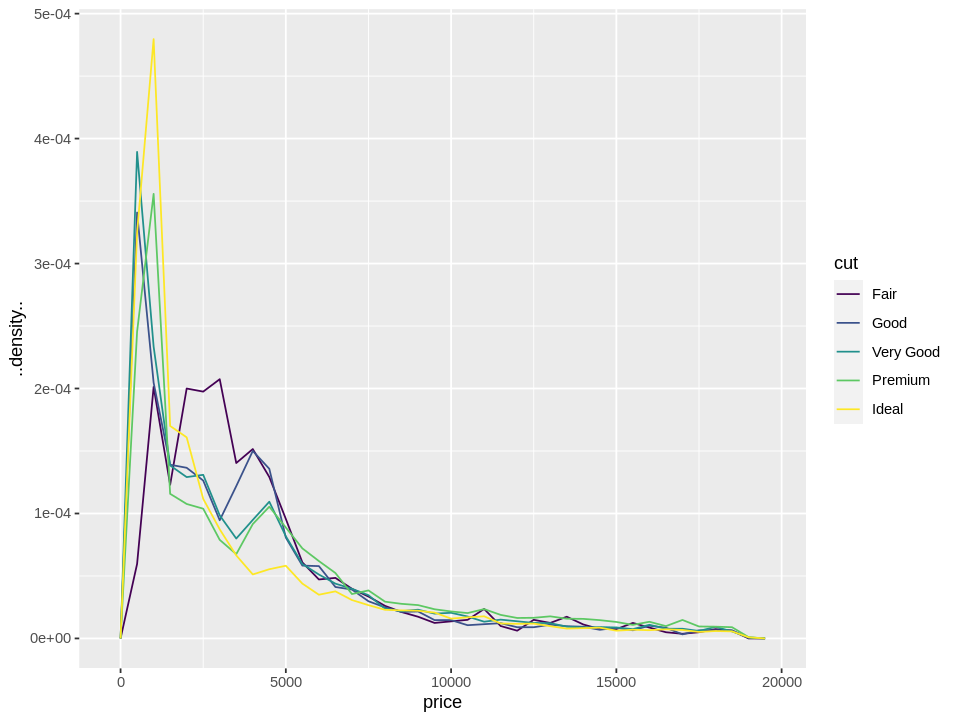

In [14]:
qplot(price, ..density.., color = cut, data = diamonds, geom = "freqpoly", binwidth = 500)

> Another alternative to display the distribution of a continuous variable broken down by a categorical variable is the boxplot. A *boxplot* is a type of visual shorthand for a distribution of values that is popular among statisticians.
>
> <img width="800" src="https://web.archive.org/web/20201227183224if_/https://www.oreilly.com/library/view/r-for-data/9781491910382/assets/rfds_05in14.png" />

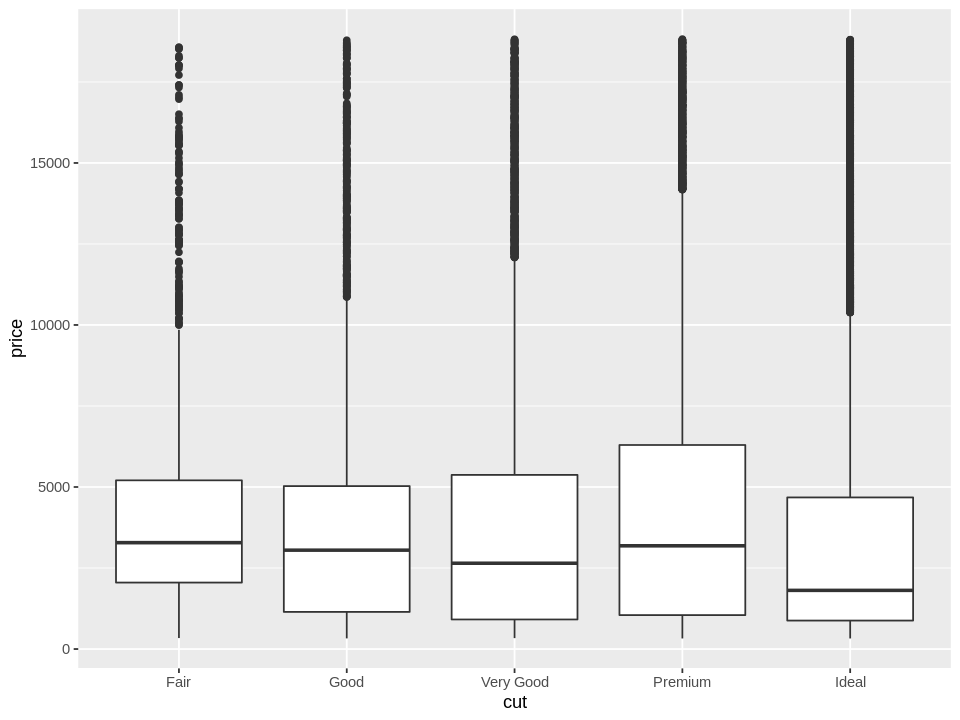

In [15]:
qplot(cut, price, data = diamonds, geom = "boxplot")

> `cut` is an ordered factor: fair is worse than good, which is worse than very good, and so on. Many categorical variables don’t have such an intrinsic order, so you might want to reorder them to make a more informative display. One way to do that is with the `reorder()` function.

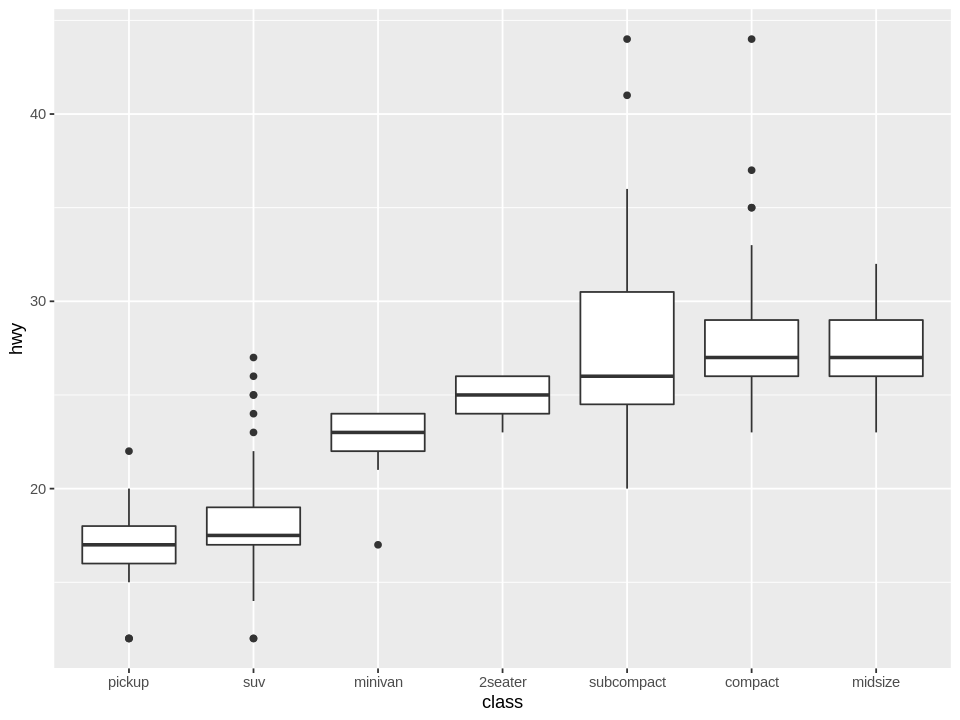

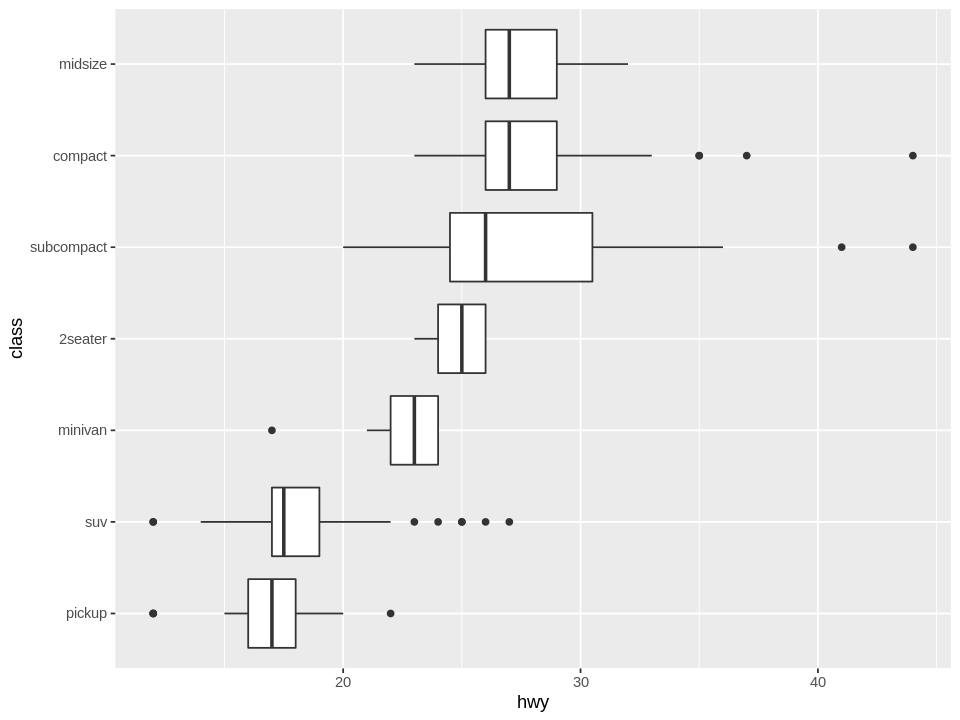

In [16]:
qplot(reorder(class, hwy, FUN = median), hwy, data = mpg, geom = "boxplot", xlab = "class")
qplot(reorder(class, hwy, FUN = median), hwy, data = mpg, geom = "boxplot", xlab = "class") + coord_flip()

### Exercises

1. Use what you’ve learned to improve the visualization of the departure times of cancelled versus noncancelled flights.
1. What variable in the diamonds dataset is most important for predicting the price of a diamond? How is that variable correlated with cut? Why does the combination of those two relationships lead to lower quality diamonds being more expensive?
1. Install the **ggstance** package, and create a horizontal boxplot. How does this compare to using `coord_flip()`?
1. One problem with boxplots is that they were developed in an era of much smaller datasets and tend to display a prohibitively large number of “outlying values.” One approach to remedy this problem is the letter value plot. Install the **lvplot** package, and try using `geom_lv()` to display the distribution of price versus cut. What do you learn? How do you interpret the plots?
1. Compare and contrast `geom_violin()` with a faceted `geom_histogram()`, or a colored `geom_freqpoly()`. What are the pros and cons of each method?
1. If you have a small dataset, it’s sometimes useful to use `geom_jitter()` to see the relationship between a continuous and categorical variable. The **ggbeeswarm** package provides a number of methods similar to `geom_jitter()`. List them and briefly describe what each one does.

### Two Categorical Variables

# A tibble: 35 x 3
   cut   color     n
   <ord> <ord> <int>
 1 Fair  D       163
 2 Fair  E       224
 3 Fair  F       312
 4 Fair  G       314
 5 Fair  H       303
 6 Fair  I       175
 7 Fair  J       119
 8 Good  D       662
 9 Good  E       933
10 Good  F       909
# … with 25 more rows


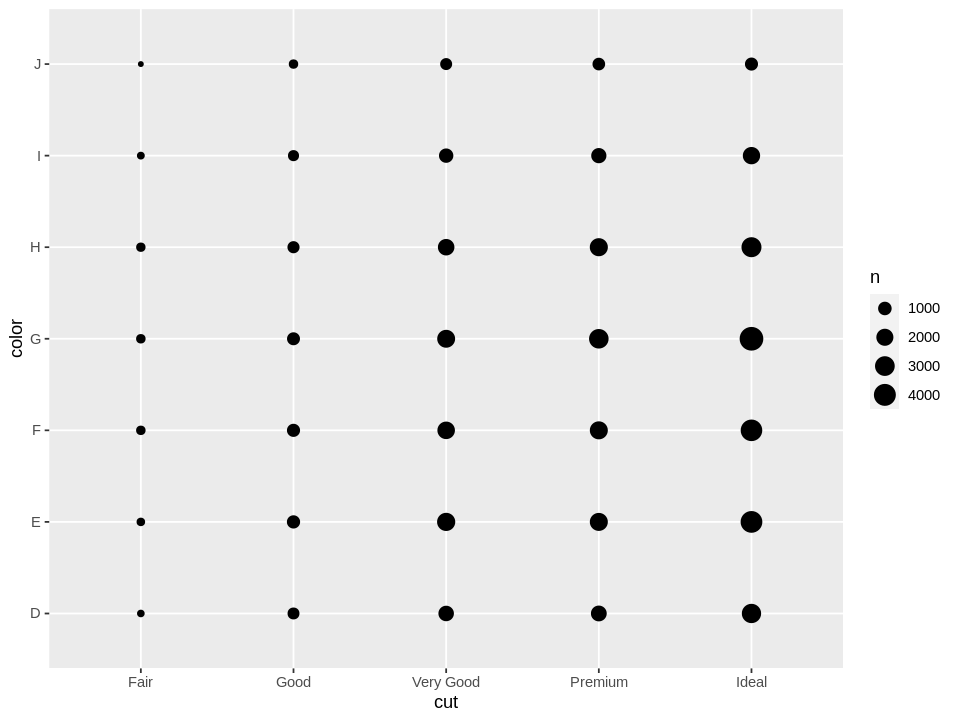

In [17]:
count(diamonds, cut, color) %>% print
qplot(cut, color, data = diamonds, geom = "count")

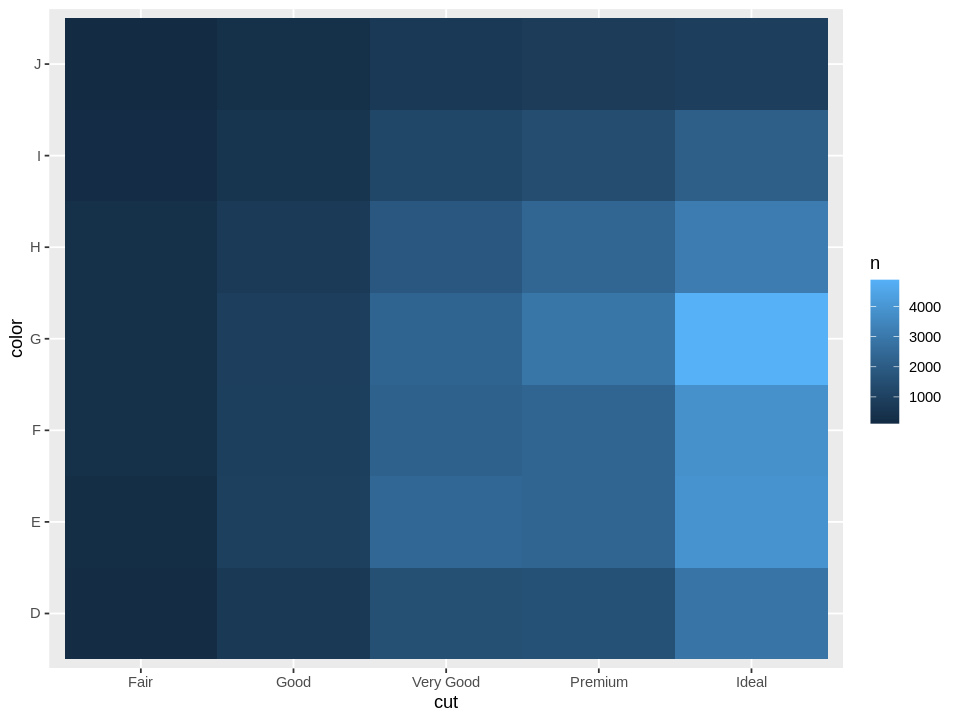

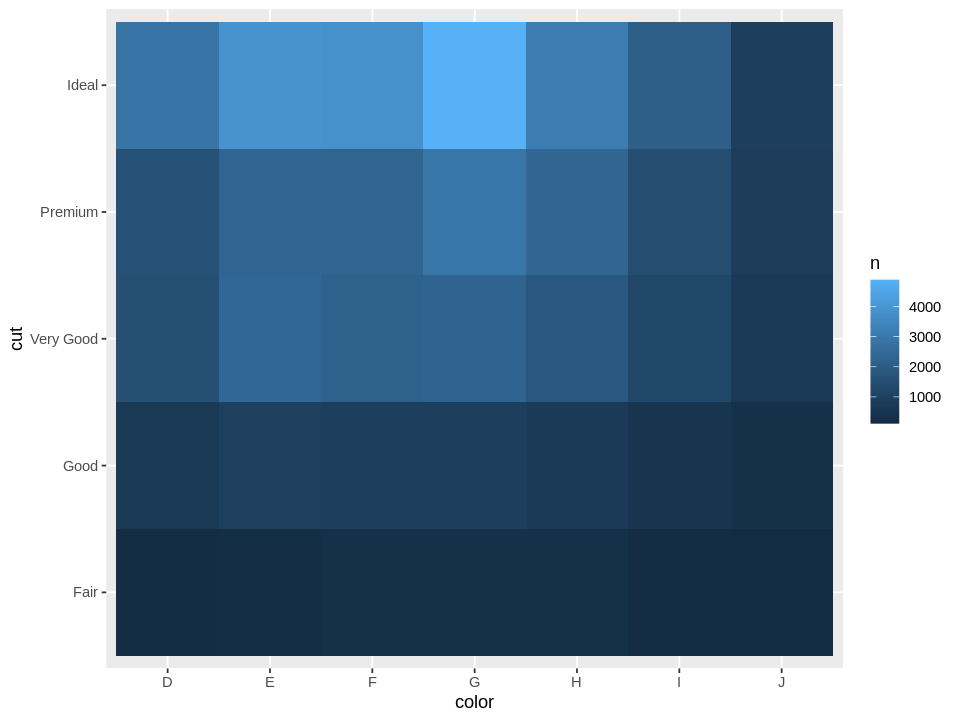

In [18]:
qplot(cut, color, fill = n, data = count(diamonds, cut, color), geom = "tile")
qplot(color, cut, fill = n, data = count(diamonds, color, cut), geom = "tile")

> If the categorical variables are unordered, you might want to use the **seriation** package to simultaneously reorder the rows and columns in order to more clearly reveal interesting patterns. For larger plots, you might want to try the **d3heatmap** or **heatmaply** packages, which create interactive plots.

### Exercises

1. How could you rescale the count dataset to more clearly show the distribution of cut within color, or color within cut?
1. Use `geom_tile()` together with **dplyr** to explore how average flight delays vary by destination and month of year. What makes the plot difficult to read? How could you improve it?
1. Why is it slightly better to use `aes(x = color, y = cut)` rather than `aes(x = cut, y = color)` in the previous example?

### Two Continuous Variables

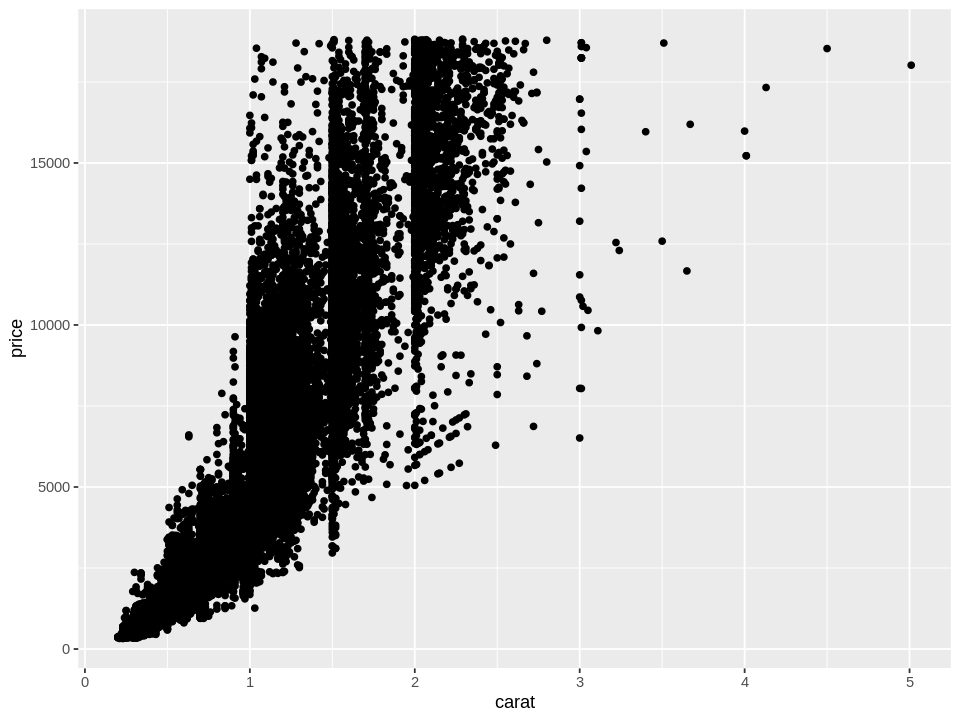

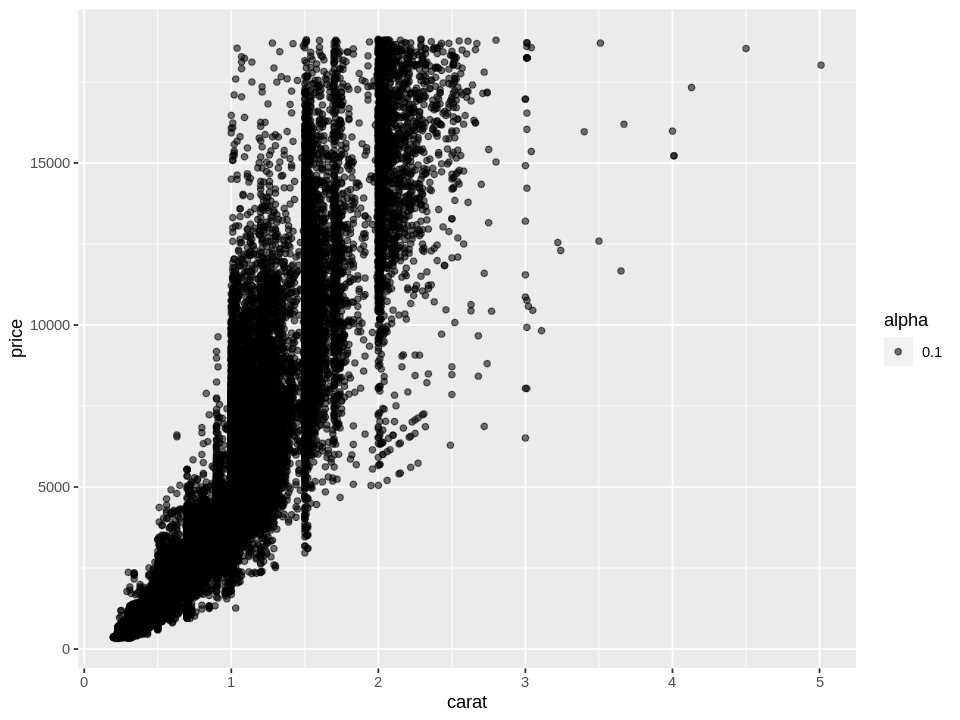

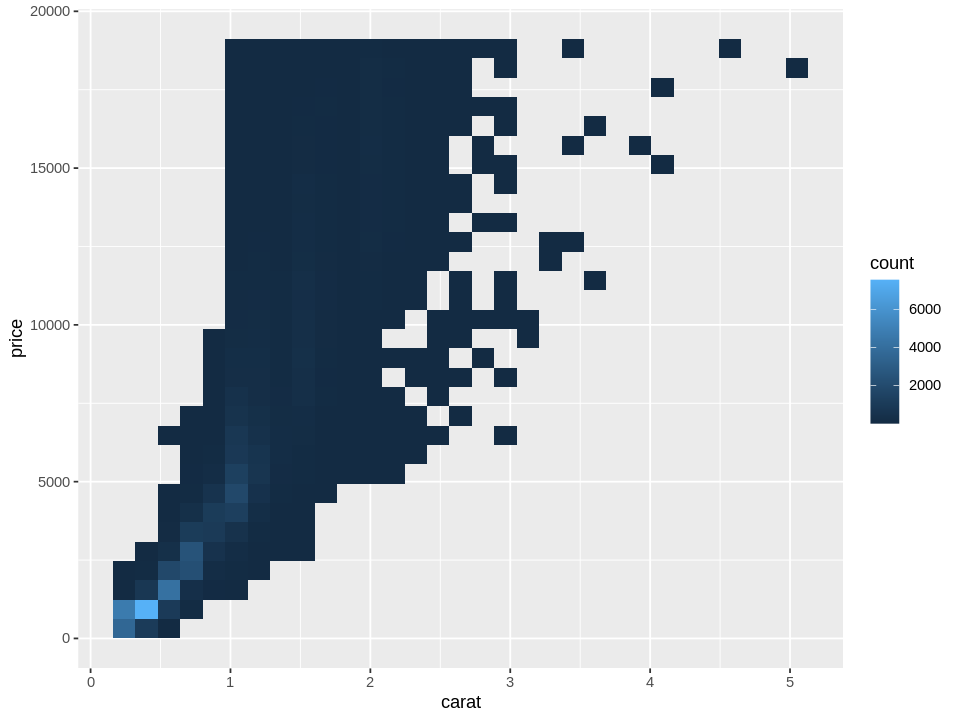

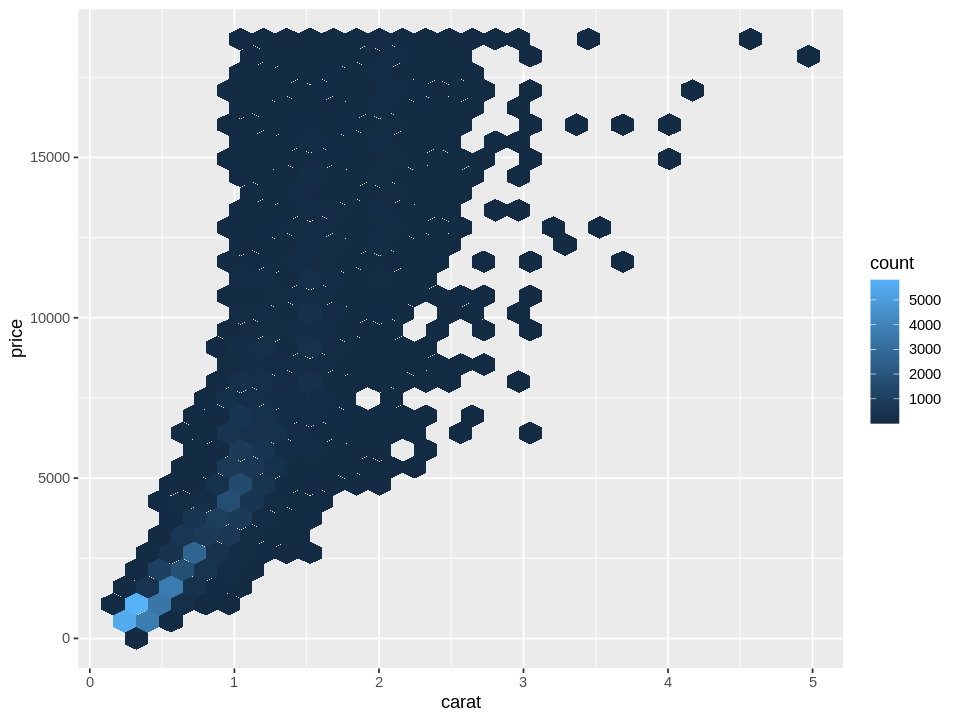

In [19]:
qplot(carat, price, data = diamonds)
qplot(carat, price, data = diamonds, alpha = .1)
qplot(carat, price, data = diamonds, geom = "bin2d")
qplot(carat, price, data = diamonds, geom = "hex")

> Another option is to bin one continuous variable so it acts like a categorical variable.

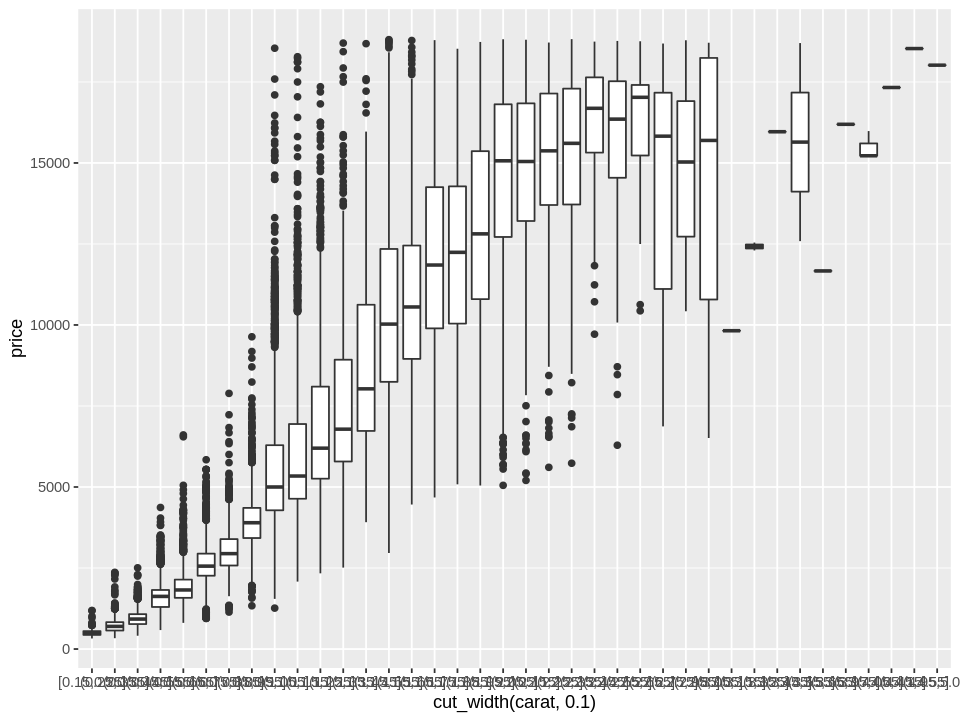

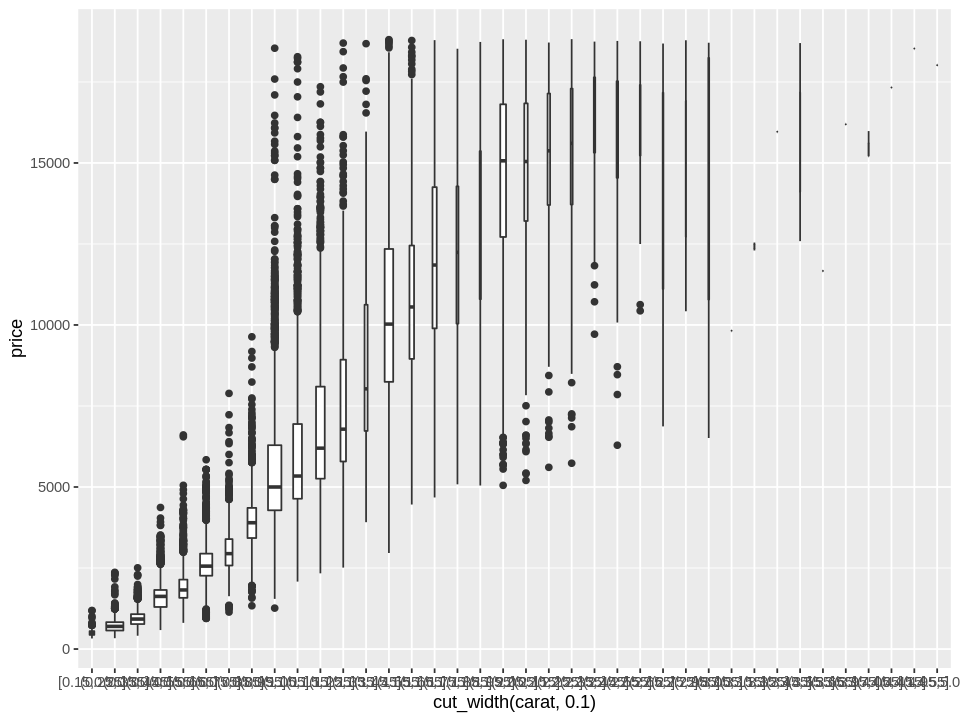

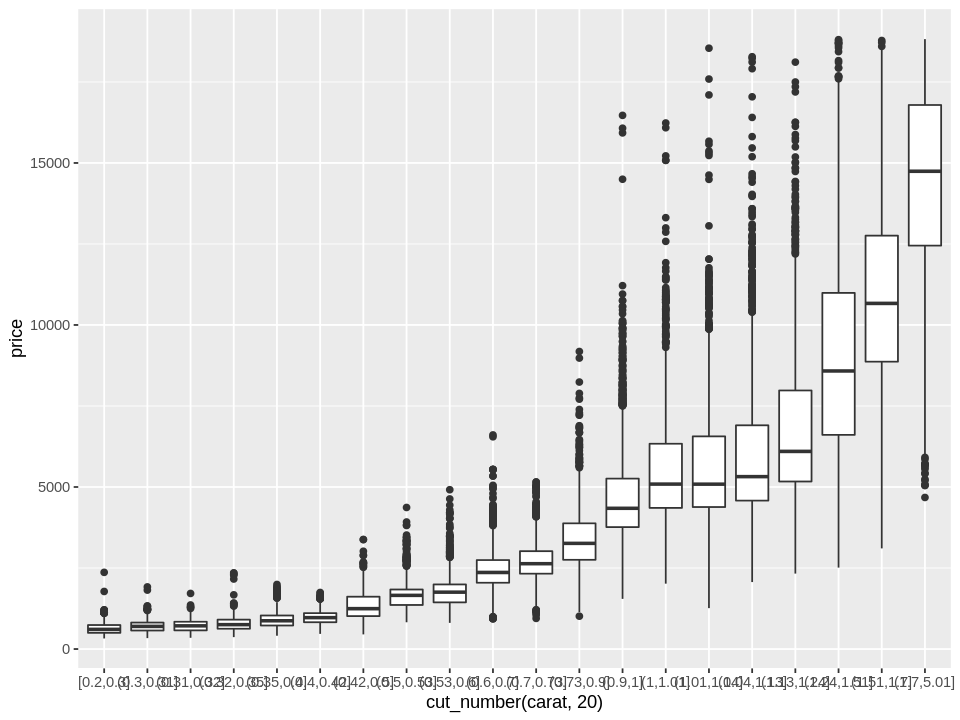

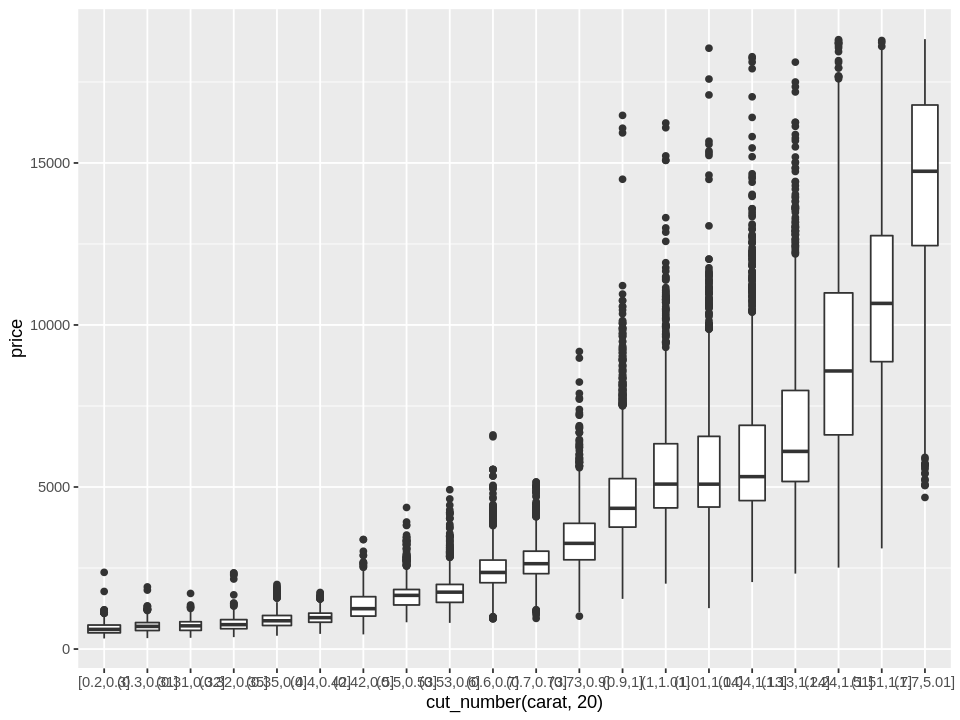

In [20]:
qplot(cut_width(carat, .1), price, data = diamonds, geom = "boxplot")
qplot(cut_width(carat, .1), price, data = diamonds, geom = "boxplot", varwidth = TRUE)
qplot(cut_number(carat, 20), price, data = diamonds, geom = "boxplot")
qplot(cut_number(carat, 20), price, data = diamonds, geom = "boxplot", varwidth = TRUE)

### Exercises

1. Instead of summarizing the conditional distribution with a boxplot, you could use a frequency polygon. What do you need to consider when using `cut_width()` versus `cut_number()`? How does that impact a visualization of the 2D distribution of `carat` and `price`?
1. Visualize the distribution of `carat`, partitioned by `price`.
1. How does the price distribution of very large diamonds compare to small diamonds. Is it as you expect, or does it surprise you?
1. Combine two of the techniques you’ve learned to visualize the combined distribution of `cut`, `carat`, and `price`.
1. Two-dimensional plots reveal outliers that are not visible in one-dimensional plots. For example, some points in the following plot have an unusual combination of `x` and `y` values, which makes the points outliers even though their `x` and `y` values appear normal when examined separately:

    ```r
    ggplot(data = diamonds) +
      geom_point(mapping = aes(x = x, y = y)) +
      coord_cartesian(xlim = c(4, 11), ylim = c(4, 11))
    ```

    Why is a scatterplot a better display than a binned plot for this case?
    
## Patterns and Models

> - Could this pattern be due to coincidence (i.e., random chance)?
> - How can you describe the relationship implied by the pattern?
> - How strong is the relationship implied by the pattern?
> - What other variables might affect the relationship?
> - Does the relationship change if you look at individual subgroups of the data?

> Patterns provide one of the most useful tools for data scientists because they reveal covariation. If you think of variation as a phenomenon that creates uncertainty, covariation is a phenomenon that reduces it. If two variables covary, you can use the values of one variable to make better predictions about the values of the second. If the covariation is due to a causal relationship (a special case), then you can use the value of one variable to control the value of the second.

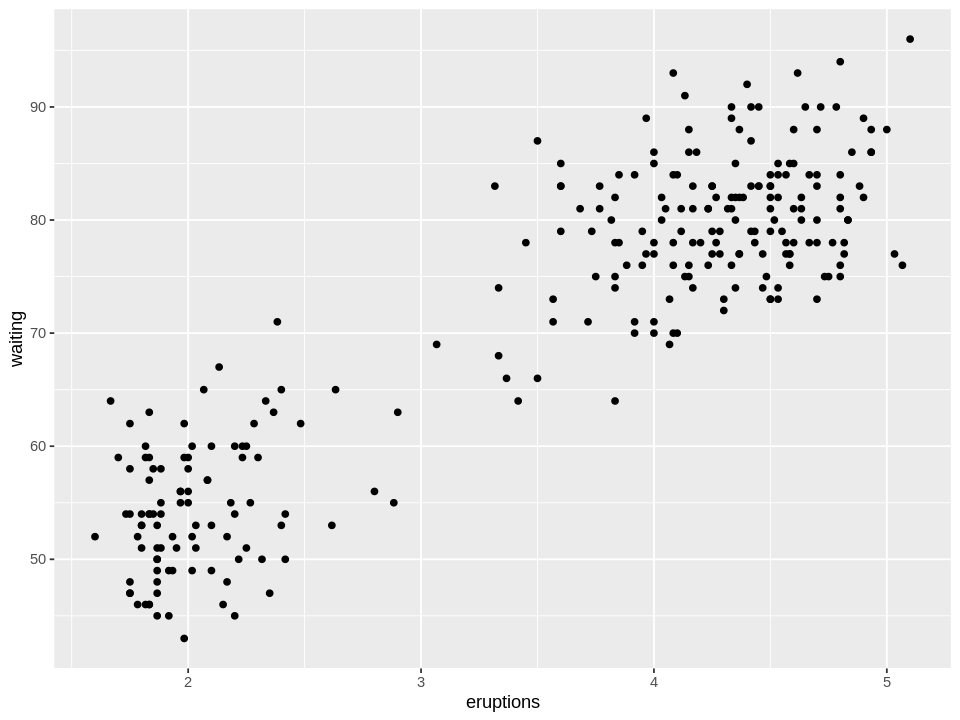

In [21]:
qplot(eruptions, waiting, data = faithful)

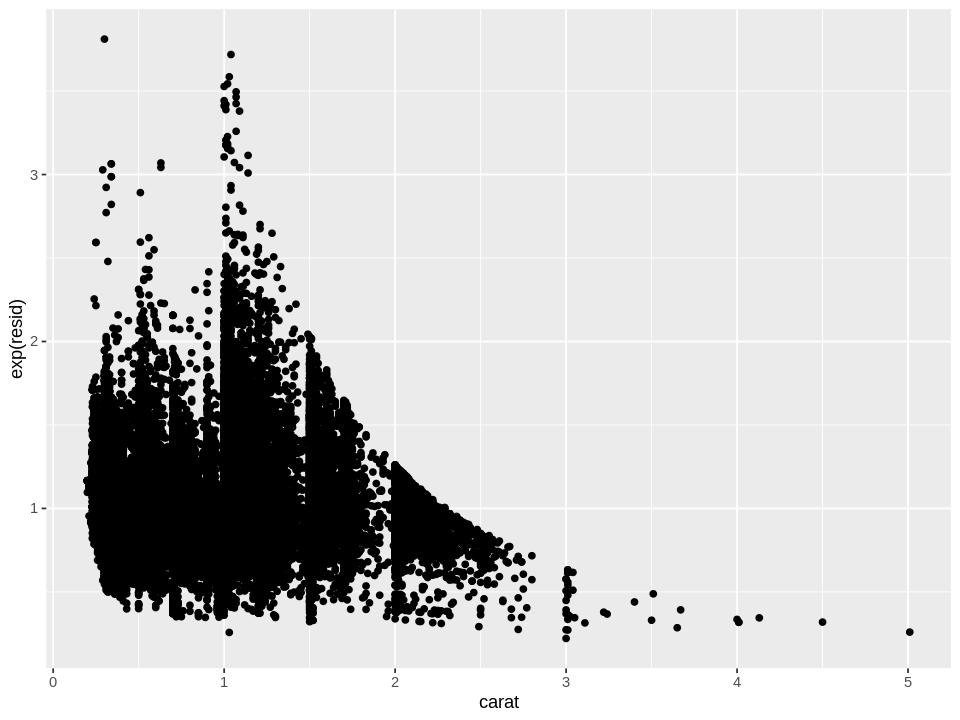

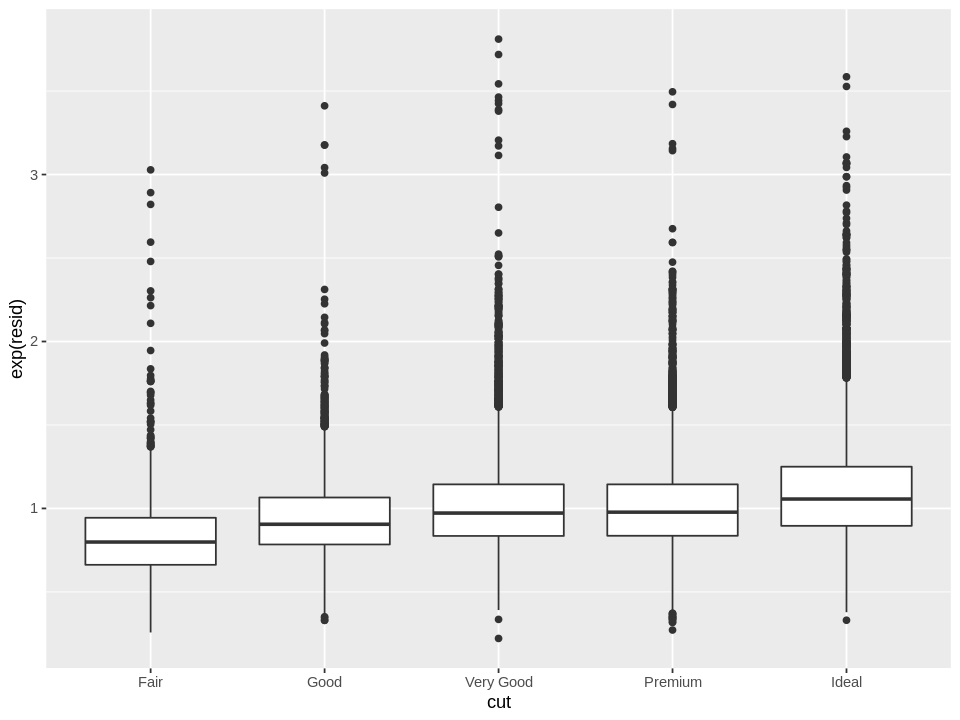

In [22]:
model <- lm(log(price) ~ log(carat), data = diamonds)

add_residuals(diamonds, model) %>% qplot(carat, exp(resid), data = .)
add_residuals(diamonds, model) %>% qplot(cut, exp(resid), data = ., geom = "boxplot")

> If you want learn more about the mechanics of **ggplot2**, I’d highly recommend grabbing a copy of the [**ggplot2 book**](https://ggplot2-book.org/).
>
> Another useful resource is the [*R Graphics Cookbook*](https://learning.oreilly.com/library/view/r-graphics-cookbook/9781449363086/) by Winston Chang. Much of the contents are available online at *http://www.cookbook-r.com/Graphs/*.
>
> I also recommend [*Graphical Data Analysis with R*](https://learning.oreilly.com/library/view/graphical-data-analysis/9781498786775/), by Antony Unwin. This is a book-length treatment similar to the material covered in this chapter, but has the space to go into much greater depth.